The most of contents borrowed from the book 『Python Data Science Handbook: Essential Tools for Working with Data, Jake VanderPlas, O'REILLY, 2017』. I have just added somewhat object-oriented or matlab style codes.

# Customizing Legends

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

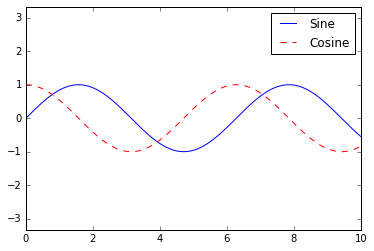

In [2]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend()

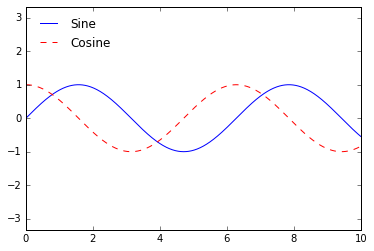

In [18]:
ax.legend(loc='upper left', frameon=False)
fig

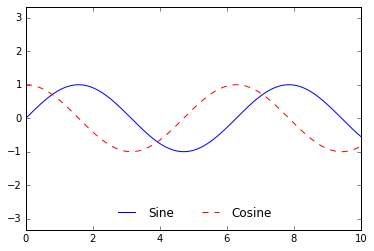

In [19]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

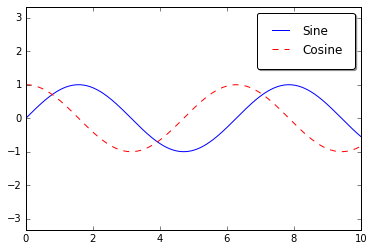

In [20]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### Legend for Size of Points

In [3]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

Text(0.5, 1.0, 'California Cities: Area and Population')

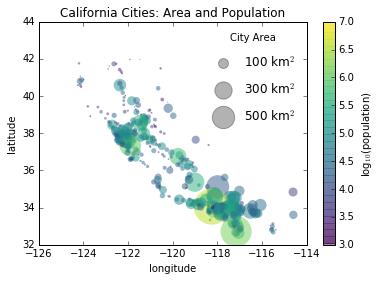

In [4]:
# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,\
           c=np.log10(population), cmap='viridis',\
           s=area, linewidth=0, alpha=0.5)
plt.axis(aspect = 'equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

#Here we create a legend:
#We will plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,\
                label=str(area)+ ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,\
          labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population')

Text(0.5, 1.0, 'California Cities: Area and Population')

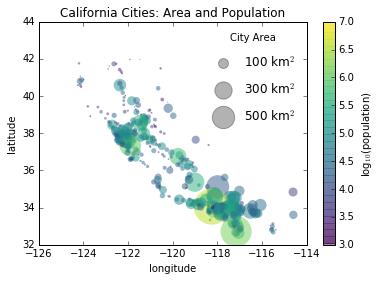

In [5]:
# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

scatter = ax1.scatter(lon, lat, label=None,\
           c=np.log10(population), cmap='viridis',\
           s=area, linewidth=0, alpha=0.5)
ax1.axis(aspect='equal')
ax1.set_xlabel('longitude')
ax1.set_ylabel('latitude')
scatter.set_clim(3,7)
fig.colorbar(scatter, ax=ax1,\
             label='log$_{10}$(population)')

for area in [100, 300, 500]:
    ax1.scatter([], [], c='k', alpha=0.3, s=area,\
                label=str(area)+ ' km$^2$')
ax1.legend(scatterpoints=1, frameon=False,\
          labelspacing=1, title='City Area')
ax1.set_title('California Cities: Area and Population')

In [6]:
print(type(scatter))

<class 'matplotlib.collections.PathCollection'>


### Multiple Legends

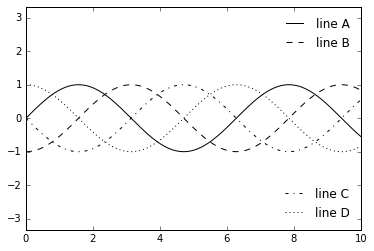

In [21]:
fig, ax = plt.subplots()

lines =[]
styles = ['-','--','-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi /2),
                    styles[i], color='black')
ax.axis('equal')

#specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right',\
          frameon=False)

#Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],\
            loc='lower right', frameon=False)
ax.add_artist(leg)